In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-01-28 to 2019-07-26 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

114


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
CET,122,0.148553,0.306483,0.458807,21.049252,5.332892
QQQ,122,0.138807,0.403118,0.324646,20.212107,10.983212
ADX,122,0.137913,0.285610,0.455085,19.594122,5.318352
VUG,122,0.137202,0.341623,0.378386,20.213354,8.023383
MGK,122,0.137127,0.350976,0.368090,20.309363,8.647441
MTUM,122,0.133136,0.278515,0.449524,19.278504,2.859384
USA,122,0.133033,0.332346,0.376404,19.353206,6.329114
FPX,122,0.132567,0.334964,0.372071,18.896690,5.445800
FTC,122,0.131129,0.323360,0.380975,19.118952,5.641527


evicted VGSH 0.796 -0.466
evicted STIP 0.900 -0.070
evicted SCHD 0.845 -0.456
evicted VMBS 0.862 -0.363
evicted FDL 0.807 -0.399
evicted IPE 0.638 -0.249
evicted USMV 0.761 -0.203
retry backlogs ['SPY', 'SPYG', 'IEI', 'SCHO', 'TLT', 'IWV', 'SCHX', 'IVW', 'IEF', 'TIP', 'VTI', 'SPTM', 'VTV', 'VTIP', 'IWB', 'TDTT', 'VONG', 'PRF', 'VYM', 'SCHB', 'SCHV', 'VGLT', 'GOVT', 'VGIT', 'VOO', 'SPLG', 'ONEQ', 'OEF', 'MGK', 'DSI', 'XLG', 'SHY', 'SPTS', 'SCHP', 'MGV', 'FNDX', 'IUSV', 'SPYV', 'IVE', 'MTUM', 'VV', 'VONV', 'QQQ', 'IVV', 'MGC', 'SPLV', 'FTA', 'GSLC', 'MBB', 'LRGF', 'FEX', 'SCHR', 'NOBL', 'DHS', 'FTC', 'DGRO', 'DTN', 'IWY', 'VOOG', 'JKE', 'VONE', 'IYY', 'DLN', 'IUSG', 'IWF', 'SCHG', 'TLH', 'SPHD', 'SDY', 'FVD', 'QDF', 'SPYD', 'ITOT', 'SCHK', 'TILT', 'RSP', 'DGRW', 'JHML', 'HDV', 'IWD', 'DIA', 'FTCS', 'VIG', 'SUSA', 'FV', 'PKW', 'QUAL', 'SPHQ', 'PWV', 'VOOV', 'JKD', 'FPX', 'RPG', 'CFO', 'VUG', 'RDIV', 'RWL', 'EDV', 'SDOG', 'VLUE', 'RPV', 'MOAT', 'DVY', 'USA', 'CET'] at 0.905/-0.51 - 0.794
e

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.093595,0.103004,-0.157114,0.024541,0.083826,0.162995,0.374608,0.831602,12.907768,0.799673
ADX,122.0,0.137913,0.285610,-0.664982,-0.036042,0.143540,0.301658,1.029532,0.455085,19.594122,5.318352
TLH,122.0,0.063868,0.166336,-0.399220,-0.032102,0.047532,0.151294,0.533710,0.336259,8.578712,2.264968


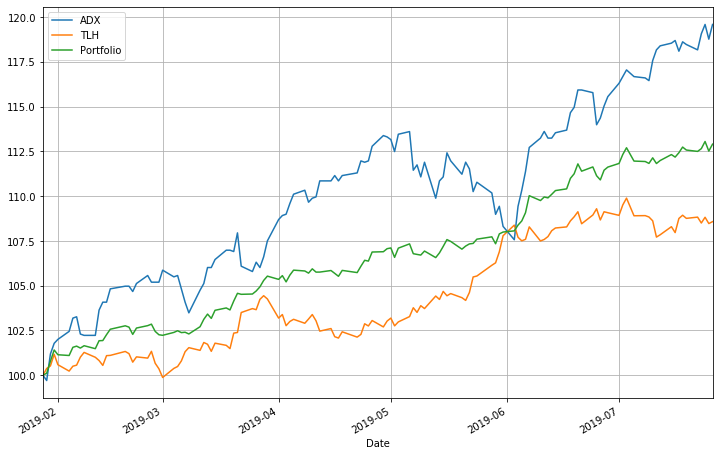

In [4]:
bounds = .08, .12
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(max_count=2, _lambda=1, bounds=bounds)
quote.setup_mask(['ADX', 'SPTL'])
sd.update(quote.optimize_portfolio(max_count=2, _lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(max_count=2, _lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.107293,0.124967,-0.205037,0.020411,0.107540,0.205222,0.407177,0.795064,14.900960,1.019249
ADX,122.0,0.137913,0.285610,-0.664982,-0.036042,0.143540,0.301658,1.029532,0.455085,19.594122,5.318352
SPTL,122.0,0.078229,0.235919,-0.591965,-0.041864,0.055302,0.225390,0.743020,0.297951,10.533963,2.930501


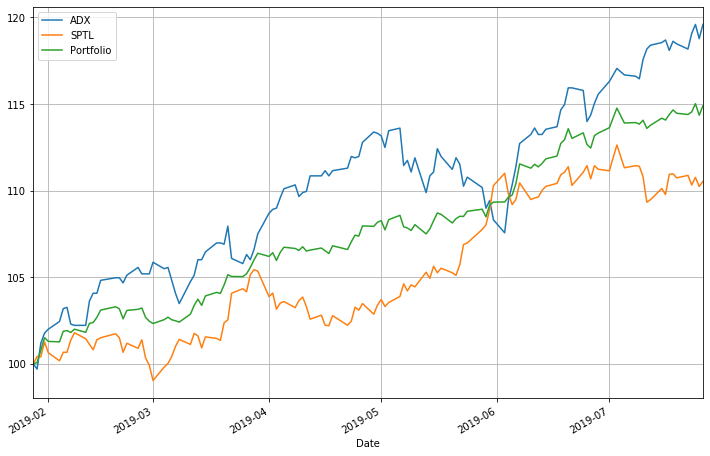

In [5]:
quote.setup_mask(['ADX', 'SPTL'])
quote.graph({'ADX': 0.482, 'SPTL': 0.518})